In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
df = pd.read_excel(r"C:\Users\KASIREDDY HARSHINI\Downloads\archive (3)\Telco_Customer_Churn.xlsx", engine='openpyxl')

# Display first 5 rows
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.shape         # Number of rows and columns
df.columns       # List of column names
df.info()        # Data types and null values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [11]:
df.drop(['CustomerID', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Churn Reason'], axis=1, inplace=True)


In [6]:
df.isnull().sum()


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [26]:
# Step 6: Drop Target-Leaking Columns & Define X and y
X = df_encoded.drop(['Churn Value', 'Churn Label_Yes', 'Churn Score', 'CLTV'], axis=1)
y = df_encoded['Churn Value']


In [27]:
# Step 7: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Step 8: Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
# Step 9: Make Predictions
y_pred = rf.predict(X_test)


In [30]:
# Step 10: Evaluate the Model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.794180269694819
Confusion Matrix:
 [[920  89]
 [201 199]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1009
           1       0.69      0.50      0.58       400

    accuracy                           0.79      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409



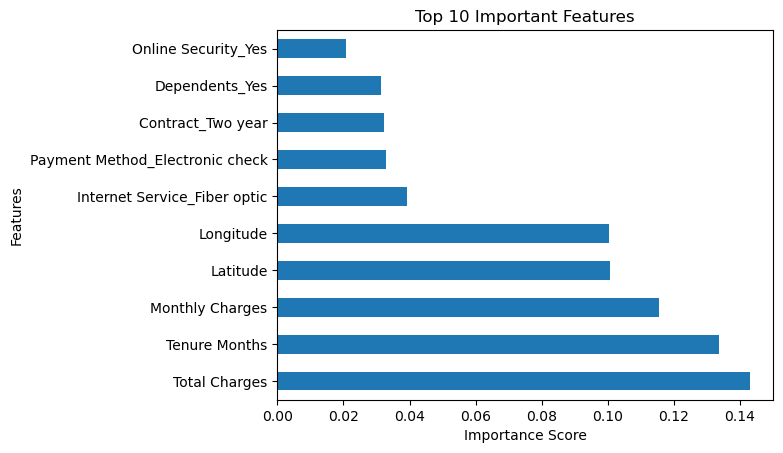

In [31]:
# Step 11: Plot Top 10 Important Features
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns)
features.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [32]:
# Step 8: Feature Scaling (important for Logistic Regression)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
# Step 9: Train Logistic Regression Model
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000)

In [34]:
# Step 10: Predictions and Evaluation
y_pred = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.801277501774308
Confusion Matrix:
 [[899 110]
 [170 230]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1009
           1       0.68      0.57      0.62       400

    accuracy                           0.80      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.79      0.80      0.80      1409

